In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os 
import sys
sys.path.append("../src")


root_path = Path('/') / 'data' / 'mechanical'
meta_path = root_path / 'meta.csv'
folder_prefix = 'experiment_'

train= [1,2, 13,23]
test= [2,3,5,6,9,10] 

meta = pd.read_csv(meta_path, sep=';')
train_rows = meta[meta["Versuchsnummer"].isin(train)]
test_rows = meta[meta["Versuchsnummer"].isin(test)]

meta[(meta["State Description"] == "Werkzeug im Ausgangszustand") | (meta["State Description"] == "Bauteilauswerfer aus Tiefziehstufe entfernt")]


,Versuchsnummer,Name,State Description,State,ProductionSpeed (Hub/min),Produzierte Bauteile (Hübe),Datenfrequenz (kHz)
0,1,Referenz,Werkzeug im Ausgangszustand,Normal,80,200,25
1,2,Referenz,Werkzeug im Ausgangszustand,Normal,100,200,25
2,3,Referenz,Werkzeug im Ausgangszustand,Normal,150,200,25
3,4,Referenz,Werkzeug im Ausgangszustand,Normal,175,200,25
4,5,Referenz,Werkzeug im Ausgangszustand,Normal,200,200,25
5,6,Referenz,Werkzeug im Ausgangszustand,Normal,225,200,25
6,7,Referenz,Werkzeug im Ausgangszustand,Normal,250,200,25
7,8,Referenz,Werkzeug im Ausgangszustand,Normal,275,?,25
8,9,ohneAuswerfer,Bauteilauswerfer aus Tiefziehstufe entfernt,Defect,80,200,25
9,10,ohneAuswerfer,Bauteilauswerfer aus Tiefziehstufe entfernt,Defect,100,200,25


In [3]:
test_rows

,Versuchsnummer,Name,State Description,State,ProductionSpeed (Hub/min),Produzierte Bauteile (Hübe),Datenfrequenz (kHz)
1,2,Referenz,Werkzeug im Ausgangszustand,Normal,100,200,25
2,3,Referenz,Werkzeug im Ausgangszustand,Normal,150,200,25
4,5,Referenz,Werkzeug im Ausgangszustand,Normal,200,200,25
5,6,Referenz,Werkzeug im Ausgangszustand,Normal,225,200,25
8,9,ohneAuswerfer,Bauteilauswerfer aus Tiefziehstufe entfernt,Defect,80,200,25
9,10,ohneAuswerfer,Bauteilauswerfer aus Tiefziehstufe entfernt,Defect,100,200,25


/data/mechanical/experiment_1/duebel_tiefziehen_ow_segmented.npy
/data/mechanical/experiment_2/duebel_tiefziehen_ow_segmented.npy
/data/mechanical/experiment_5/duebel_tiefziehen_ow_segmented.npy
/data/mechanical/experiment_6/duebel_tiefziehen_ow_segmented.npy
/data/mechanical/experiment_19/duebel_tiefziehen_ow_segmented.npy
/data/mechanical/experiment_20/duebel_tiefziehen_ow_segmented.npy
/data/mechanical/experiment_23/duebel_tiefziehen_ow_segmented.npy
/data/mechanical/experiment_24/duebel_tiefziehen_ow_segmented.npy


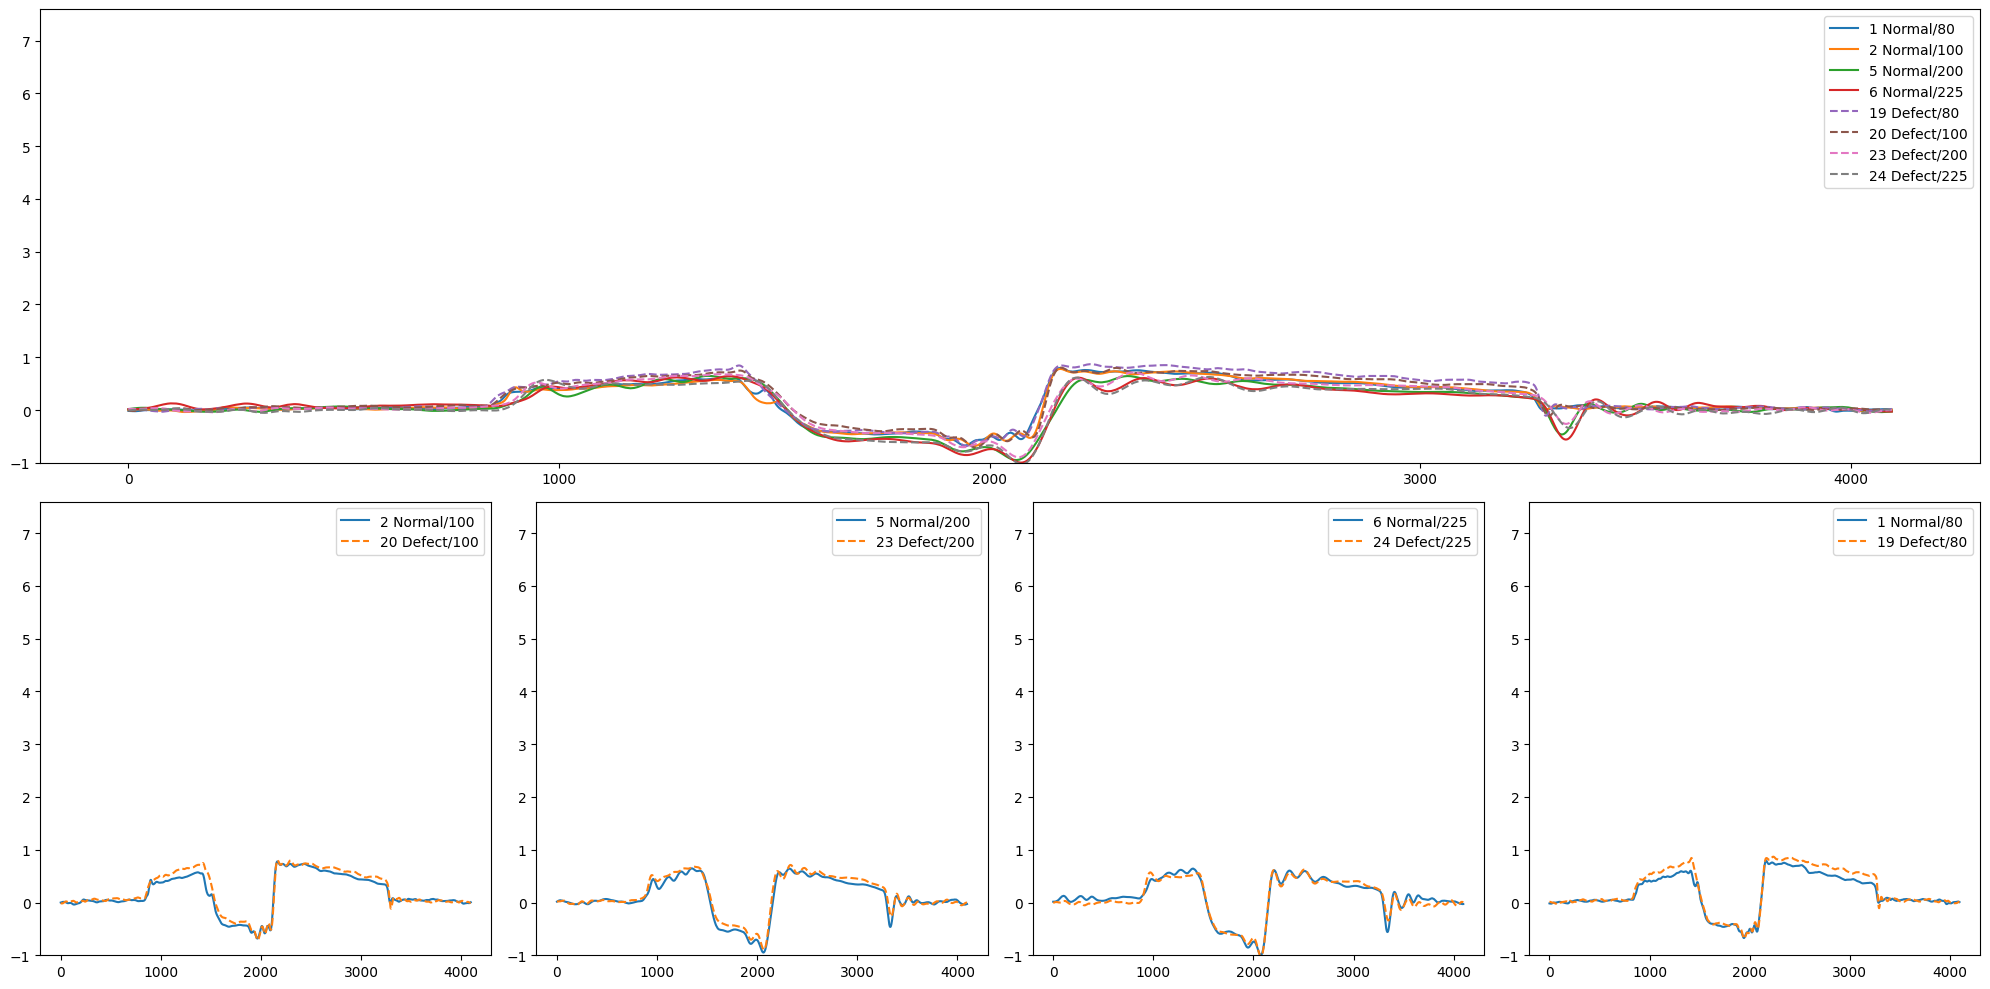

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# kind = "tiefziehen_segmented" #"rondenschnitt_segmented"
kind = "duebel_tiefziehen_ow_segmented" #"rondenschnitt_segmented"
# kind = "rondenschnitt_segmented"

full_ids = [1, 2, 5, 6, 19, 20, 23, 24]
# Assuming root_path, folder_prefix, meta, and fig are defined earlier in your code
# Collecting unique speeds and sorting them for consistent plotting
unique_speeds = sorted(meta[meta["Versuchsnummer"].isin(full_ids)]["ProductionSpeed (Hub/min)"].unique())

# Calculating the number of columns needed for the second row of subplots
num_cols = len(unique_speeds) 

# Create a figure with a specific size
fig = plt.figure(figsize=(20, 10))

# Define the grid layout for our subplots
grid_size = (2, num_cols) # Two rows, and number of columns as calculated

# First subplot occupies the first row entirely
ax0 = plt.subplot2grid(grid_size, (0, 0), colspan=num_cols, fig=fig)

# Other subplots on the second row
axes = [plt.subplot2grid(grid_size, (1, i), fig=fig) for i in range(num_cols)]

for i in full_ids:
    sensors_path = root_path / f'{folder_prefix}{i}' 
    element = meta[meta["Versuchsnummer"] == i]
    state = element["State"].values[0]
    speed = element["ProductionSpeed (Hub/min)"].values[0]
    
    has_defect = state == 'Defect'
    
    t = sensors_path / f'{kind}.npy'
    f = np.load(t)
    print(t)


    ax0.plot(f[100], label=f'{i} {state}/{speed}', linestyle='--' if has_defect else '-')
    # ax0.set_xlim(1350, 2800)
    ax0.set_ylim(-1, 7.6)
    ax0.legend()


    # Assign subplot based on speed
    # Find the subplot index for other trials and subtract 1 because indexing starts at 0
    subplot_idx = unique_speeds.index(speed) - 1
    ax = axes[subplot_idx] 
    ax.plot(f[100], label=f'{i} {state}/{speed}', linestyle='--' if has_defect else '-')
    # ax.set_xlim(1350, 2800)
    ax.set_ylim(-1, 7.6)
    ax.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots



In [6]:
from lib.preprocessing import MinMaxScaler

kind = "tiefziehen_segmented"

scaler = MinMaxScaler()

fig = plt.figure(figsize=(20,10))

f = []

a = [1,9]
a = [1,2,6,9,10,13]
a = [1,13]

for i in a:
    sensors_path = root_path / f'{folder_prefix}{i}' 

    element = meta[meta["Versuchsnummer"] == i] 
    state = element["State"].values[0]
    speed = element["ProductionSpeed (Hub/min)"].values[0]


    has_defect = state == 'Defect'

    t = sensors_path / f'{kind}.npy'
    f.append(np.load(t))
    
fs = np.concatenate(f, axis=0)

scaler = scaler.fit(fs)

for idx, i in enumerate(a):
    sensors_path = root_path / f'{folder_prefix}{i}' 

    element = meta[meta["Versuchsnummer"] == i] 
    state = element["State"].values[0]
    speed = element["ProductionSpeed (Hub/min)"].values[0]


    has_defect = state == 'Defect'
    # f = fs_[idx*193]
    # plt.ylim(-1,7.6)
    # for i in range(193):
    # fs_ = trans.transform(fs[idx*193+i])[0]
    k = scaler.transform(fs[idx*193])
    plt.plot(k, label=f'{i} {state}/{speed}', linestyle='--' if has_defect else '-')
    # f_old = fs[idx*193]

    # f_old_new = (f_old - f_old.min()) / (f_old.max() - f_old.min())
    # plt.plot(f, label=f'{i} {state}/{speed}', linestyle='--' if has_defect else '-')
    # plt.plot(f_old, label=f'{i} {state}/{speed}', linestyle='--' if has_defect else '-')
    # plt.plot(f_old_new, label=f'{i} {state}/{speed}', linestyle='--' if has_defect else '-')


# plt.xlim(1350,2800)
# plt.xlim(,2400)
fig.legend()
# f[0].shape
# plt.plot(fs_[idx*193+i], label=f'{i} {state}/{speed}', linestyle='--' if has_defect else '-')
    # f_old = fs[idx*193]

    # f_old_new = (f_old - f_old.min()) / (f_old.max() - f_old.min())
    # plt.plot(f, label=f'{i} {state}/{speed}', linestyle='--' if has_defect else '-')
    # plt.plot(f_old, label=f'{i} {state}/{speed}', linestyle='--' if has_defect else '-')
    # plt.plot(f_old_new, label=f'{i} {state}/{speed}', linestyle='--' if has_defect else '-')


# plt.xlim(1350,2800)
# plt.xlim(,2400)
fig.legend()
# f[0].shape

ValueError: Expected 2D array, got 1D array instead:
array=[-0.00020856 -0.00049418 -0.00032007 ...  0.00100022  0.00100353
  0.00107317].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<Figure size 2000x1000 with 0 Axes>

Initial shape: (103, 10)
Transformed instance: [[0.0094141 ]
 [0.01197792]
 [0.00351502]
 [0.00525611]
 [0.09143817]
 [0.04261485]
 [0.27933677]
 [0.11627288]
 [0.68242305]
 [0.41056318]]


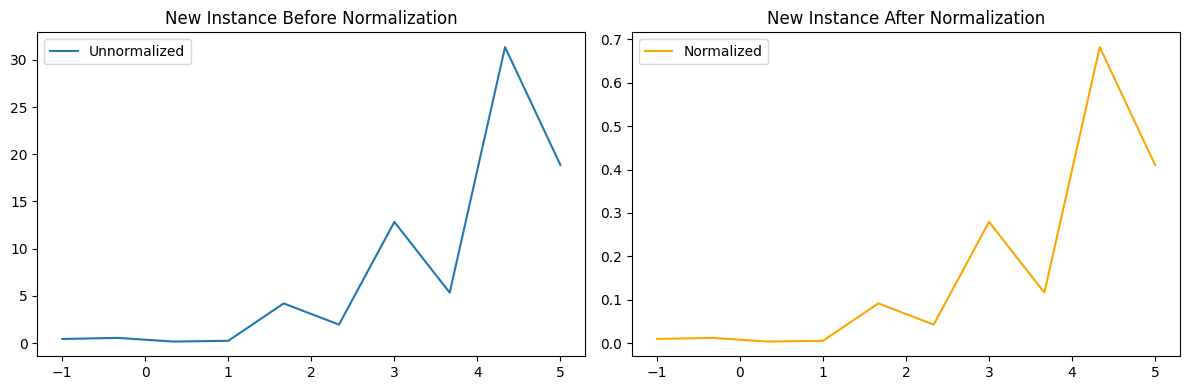

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

t = np.linspace(-1, 5, 10)
xs = []
for i in range(103):
    x = (t + np.random.randn(10)) ** 2 
    xs.append(x)

xs = np.vstack(xs) 
print('Initial shape:', xs.shape)  # Should be (103, 10)

# Flatten the data to get a single min and max for all timesteps
xs_flattened = xs.flatten().reshape(-1, 1)

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

scaler.fit(xs_flattened)

new_instance = (t + np.random.randn(10)) ** 2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].plot(t, new_instance, label='Unnormalized')
axes[0].set_title('New Instance Before Normalization')
axes[0].legend()

new_instance_transformed = np.array([scaler.transform(new_instance[i].reshape(-1, 1)).flatten() for i in range(len(new_instance))])

print('Transformed instance:', new_instance_transformed)

axes[1].plot(t, new_instance_transformed, label='Normalized', color='orange')
axes[1].set_title('New Instance After Normalization')
axes[1].legend()

plt.tight_layout()
plt.show()



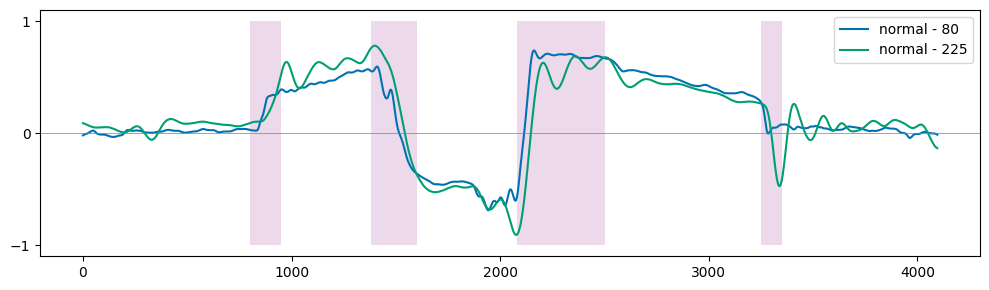

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

kind = "tiefziehen_segmented"  # "rondenschnitt_segmented"
kind = "duebel_tiefziehen_ow_segmented"

full_ids = [1, 6, 19, 24]
# Assuming root_path, folder_prefix, meta, and fig are defined earlier in your code
# Collecting unique speeds and sorting them for consistent plotting
unique_speeds = sorted(
    meta[meta["Versuchsnummer"].isin(full_ids)]["ProductionSpeed (Hub/min)"].unique()
)

map = {
    1: "normal - 80",
    6: "normal - 225",
    19: "defect - 80",
    24: "defect - 225",
}

color = {
    1: "#FD8D3C",
    6: "#00718B",
    19: "red",
    24: "green",
}

with plt.style.context(["seaborn-v0_8-colorblind"]):
# with plt.style.context(["seaborn-v0_8-deep", "seaborn-talk"]):
    plt.figure(figsize=(10, 3))
    for id in [1, 6]:
        sensors_path = root_path / f"{folder_prefix}{id}"

        t = sensors_path / f"{kind}.npy"
        f = np.load(t)

        # plot f[15]
        plt.plot(f[20], label=f"{map[id]}")

    # legend bottom right
    plt.legend(loc="upper right")
    # show less y ticks
    plt.yticks(np.arange(-1, 2, 1))

    # fill area between two x values
    plt.fill_between([800, 950], -1, 1, facecolor="purple", alpha=0.15)
    plt.fill_between([1380, 1600], -1, 1, facecolor="purple", alpha=0.15)
    plt.fill_between([2080, 2500], -1, 1, facecolor="purple", alpha=0.15)
    plt.fill_between([3250, 3350], -1, 1, facecolor="purple", alpha=0.15)

    # plot zero line
    plt.axhline(y=0, color="gray", linestyle="-", linewidth=0.5)
    plt.tight_layout()

    # plt.show()
    plt.savefig("./paper/p2s_norm.svg")